In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import copy

In [70]:
df=pd.read_csv("AdmissionDataset/data.csv")
X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
Y = df['Chance of Admit ']

In [71]:
X = (X - X.mean())/X.std()

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

In [73]:
# X_test = (X_test - X_test.mean())/X_test.std()
# X_train = (X_train - X_train.mean())/X_train.std()

In [74]:
X_train =pd.concat([X_train,Y_train],axis=1)

In [75]:
alpha = 0.01
iters = 1000

In [76]:
def mse(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.power((y_true - y_pred),2))

In [77]:
def gradientDescent(X,y,theta,iters,alpha):
    lamda=0.000000001
    for i in range(iters):
        theta1=copy.deepcopy(theta)
        theta1[0][0]=0
        theta = theta - (alpha/len(X)) * (np.sum(X * (X @ theta.T - y), axis=0)+lamda*theta1)
    
    return theta

In [78]:
maxAccuracy = 0
foldstart = 0

In [79]:
errorlist = []
k=8
for i1 in range(k):
#     print(index)
    no = int(X.shape[0]/k)
    temp=[]
    for i2 in range(i1*no,(i1+1)*no):
        temp.append(i2)
    X_train_1= X_train.drop(X_train.index[temp])
#     print(row)
    X_test1= X_train.iloc[i1*no:(i1+1)*no,0:7]
    y_test1= X_train.iloc[i1*no:(i1+1)*no,-1]
    X = X_train_1.iloc[:,0:7]
    ones = np.ones([X.shape[0],1])
    X = np.concatenate((ones,X),axis=1)
    ylist = X_train_1.iloc[:,7:8].values
    theta = np.zeros([1,8])
    
    g = gradientDescent(X,ylist,theta,iters,alpha)
    theta=g[0]
    y_pred=[]
#     print(theta)
    y_pred=[]
    for index,row in X_test1.iterrows():
        row=list(row)
        y1=0
        for i in range(0,7):
            y1 = y1 + theta[i+1]*row[i]
        y1=y1+theta[0]
        y_pred.append(y1)
        
    Accuracy = r2_score(y_test1,y_pred)
    print("Accuracy:- ",Accuracy)
    
    if Accuracy > maxAccuracy:
        maxAccuracy = Accuracy
        foldstart = i1
    
    error=mse(y_pred,y_test1)
#     print(y_pred)
    print("Error:- ",error)
    
    errorlist.append(error)

Accuracy:-  0.7490086126579751
Error:-  0.004382288813756834
Accuracy:-  0.769252626975961
Error:-  0.002674432364182497
Accuracy:-  0.6762345832206926
Error:-  0.00429715625886481
Accuracy:-  0.8363288724266912
Error:-  0.003301972933782245
Accuracy:-  0.8786371532687866
Error:-  0.003523701988239497
Accuracy:-  0.6053675636851892
Error:-  0.005502754691973723
Accuracy:-  0.8281828989737532
Error:-  0.0035672559129381206
Accuracy:-  0.8468913802813505
Error:-  0.003508637129472571


In [80]:
MeanError = np.mean(errorlist)
print("Mean Error:- ",MeanError)

Mean Error:-  0.003844775011651287


In [81]:
print("Kth fold:- ",foldstart+1)

Kth fold:-  5


In [82]:
temp=[]
k=8
no = int(X_train.shape[0]/k)
for i2 in range(foldstart*no,(foldstart+1)*no):
    temp.append(i2)
X_train_1= X_train.drop(X_train.index[temp])
X_test1= X_train.iloc[foldstart*no:(foldstart+1)*no,0:7]
y_test1= X_train.iloc[foldstart*no:(foldstart+1)*no,-1]
X = X_train_1.iloc[:,0:7]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
ylist = X_train_1.iloc[:,7:8].values
theta = np.zeros([1,8])

g = gradientDescent(X,ylist,theta,iters,alpha)
theta=g[0]

In [83]:
y_pred= []
for index,row in X_test.iterrows():
    row=list(row)
    y1=0
    for i in range(0,7):
        y1 = y1 + theta[i+1]*row[i]
    y1=y1+theta[0]
    y_pred.append(y1)

Accuracy = r2_score(Y_test,y_pred)
print("Accuracy:- ",Accuracy)

Accuracy:-  0.8319155786240866


## Analyse how behavior changes with different values of k.

* The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.

* The choice of k is usually 5 or 10, but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller

In [84]:
ferror = []
klist = []
k=2
while k<=10:
    errorlist = []
    for i1 in range(k):
        no = int(X_train.shape[0]/k)
    #     print(index)
        temp=[]
        for i2 in range(i1*no,(i1+1)*no):
            temp.append(i2)
        X_train_1= X_train.drop(X_train.index[temp])
    #     print(row)
        X_test1= X_train.iloc[i1*no:(i1+1)*no,0:7]
        y_test1= X_train.iloc[i1*no:(i1+1)*no,-1]
        X = X_train_1.iloc[:,0:7]
        ones = np.ones([X.shape[0],1])
        X = np.concatenate((ones,X),axis=1)
        ylist = X_train_1.iloc[:,7:8].values
        theta = np.zeros([1,8])

        g = gradientDescent(X,ylist,theta,iters,alpha)
        theta=g[0]
        y_pred=[]
    #     print(theta)
        y_pred=[]
        for index,row in X_test1.iterrows():
            row=list(row)
            y1=0
            for i in range(0,7):
                y1 = y1 + theta[i+1]*row[i]
            y1=y1+theta[0]
            y_pred.append(y1)

        Accuracy = r2_score(y_test1,y_pred)
#         print("Accuracy:- ",Accuracy)

        if Accuracy > maxAccuracy:
            maxAccuracy = Accuracy
            foldstart = i1

        error=mse(y_pred,y_test1)
    #     print(y_pred)
#         print("Error:- ",error)

        errorlist.append(error)
    
    ferror.append(np.mean(errorlist))
    klist.append(k)
    k=k+2

Text(0.5, 1.0, 'K vs Error')

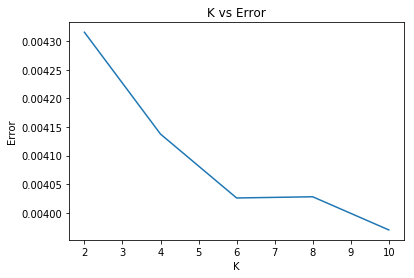

In [85]:
fig, ax = plt.subplots()
# print(lamdalist)
# print(errorlist)
ax.plot(klist,ferror)
ax.set_xlabel("K", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('K vs Error')